In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Seperating string and numerical columns 

In [9]:
string_col=df.select_dtypes("object").columns.to_list()
num_col=df.columns.to_list()

for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

print(f'String col = {string_col} \n\nNumerical Col = {num_col}')

String col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

Numerical Col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


# Exploratory Data Analysis

<AxesSubplot:>

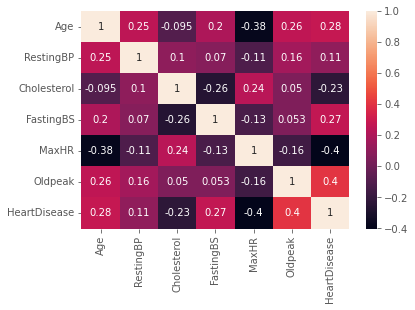

In [10]:
sns.heatmap(df.corr(), annot=True)

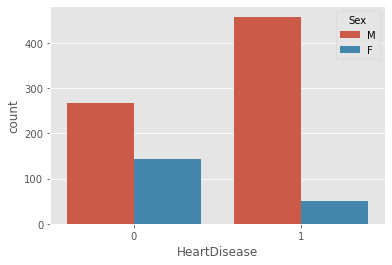

In [11]:
fig = sns.countplot(data=df, x='HeartDisease', hue='Sex')

<Figure size 1440x1440 with 0 Axes>

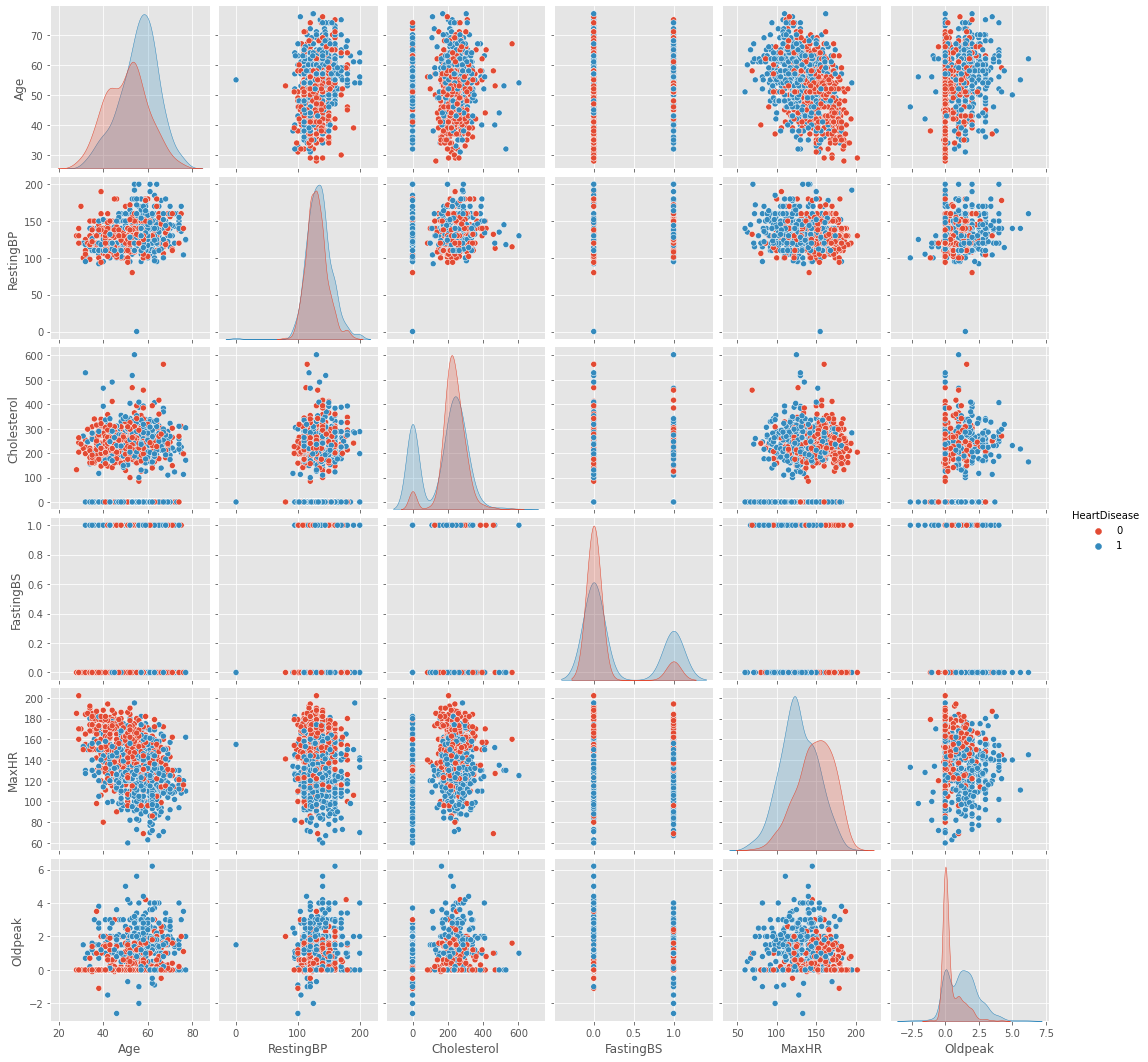

In [12]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='HeartDisease')

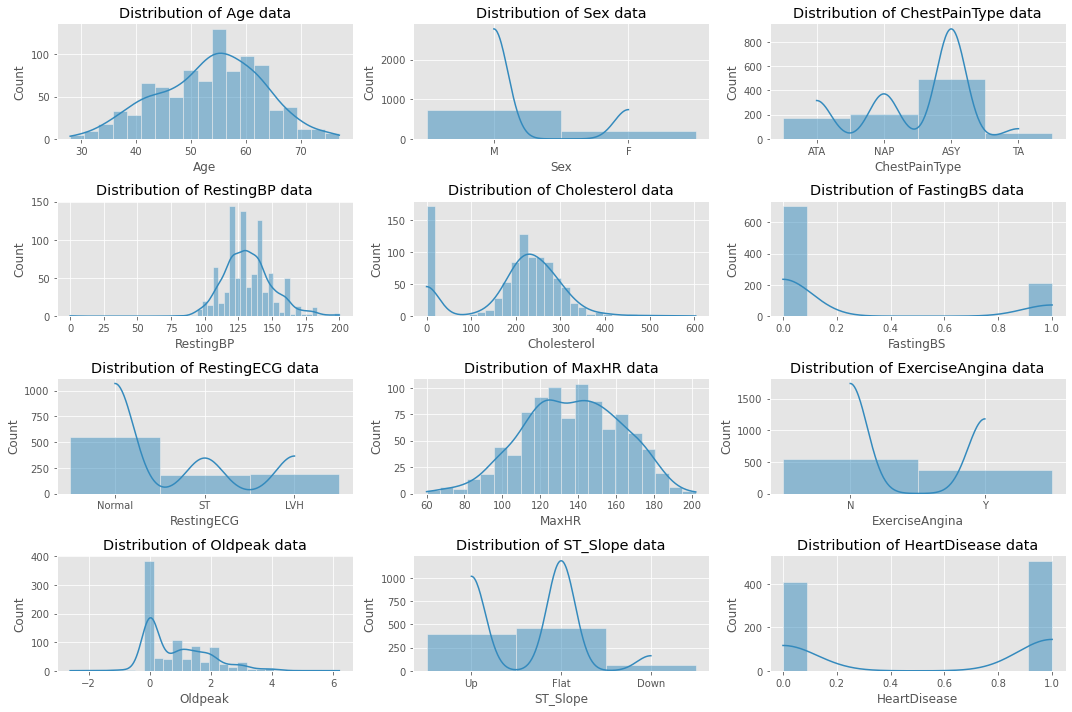

In [13]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    

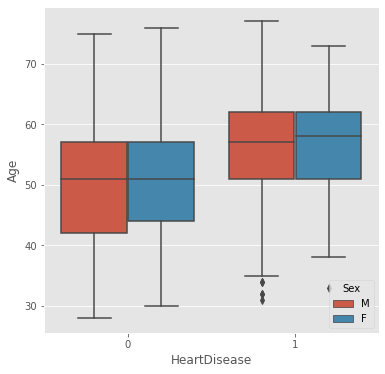

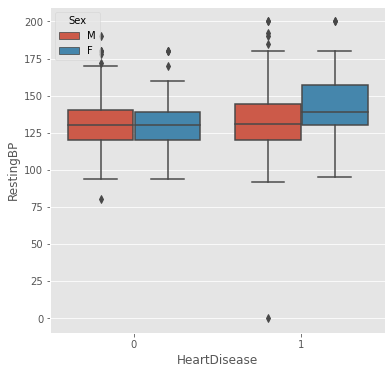

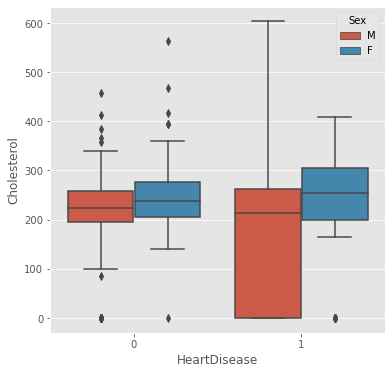

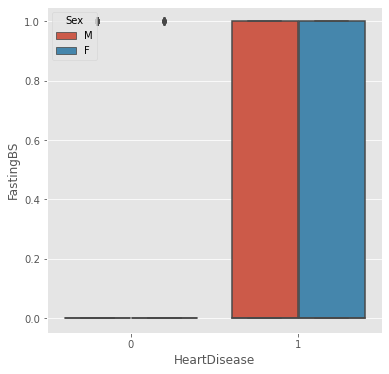

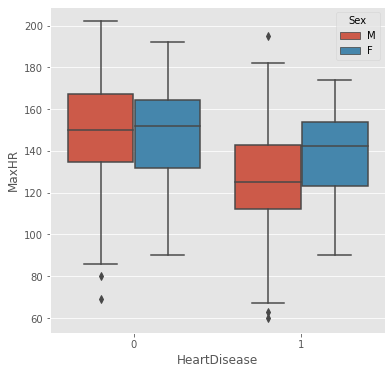

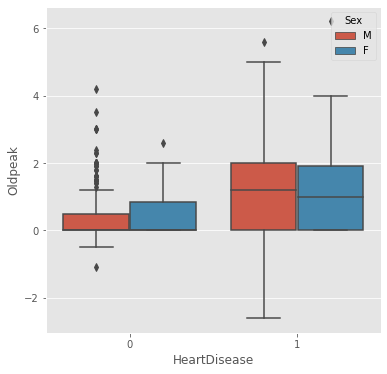

In [14]:
for col in num_col:
    plt.figure(figsize=(6,6))
    sns.boxplot(y = col, x = 'HeartDisease',
                    data = df, orient='vertical',
                    hue=df['Sex'])
    plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
for col in string_col:
    print(df[col].value_counts(),'\n')
    

M    725
F    193
Name: Sex, dtype: int64 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



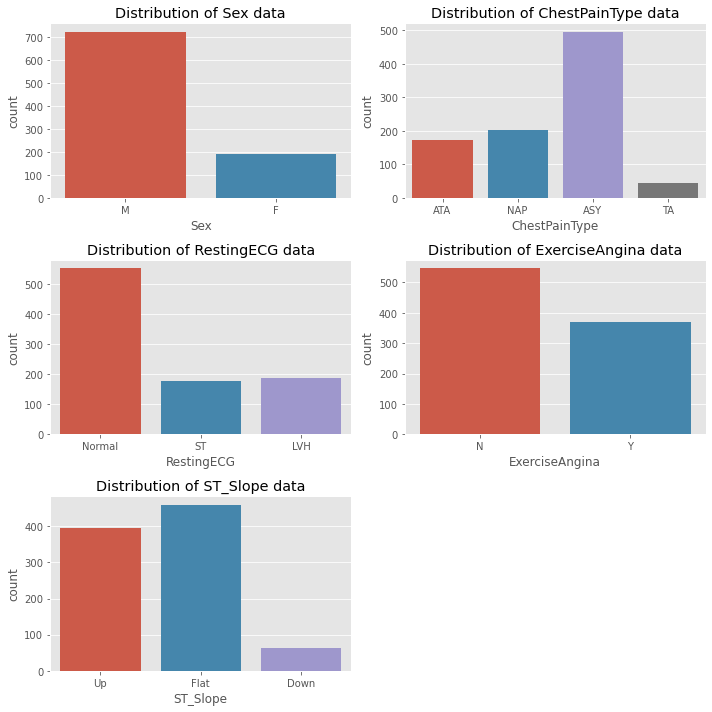

In [17]:
plt.figure(figsize=(10,10))
for i,col in enumerate(string_col, 1):
    plt.subplot(3,2,i)
    plt.title(f"Distribution of {col} data")
    sns.countplot(df[col], )
    plt.tight_layout()
    

# LabelEncoder for Tree-based models

In [18]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


We can use this directly in many tree-based models:

* Decision trees
* Random forest
* Extra Trees
* Or any kind of boosted trees model
    * XGBoost
    * GBM
    * LightGBM

# One Hot Encoder for Non-Tree-based models

In [19]:
df_nontree = pd.get_dummies(df, columns=string_col, drop_first=True)
print(df_nontree.shape)
df_nontree.head()

(918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [20]:
target = 'HeartDisease'
y = df_nontree[target].values
df_nontree.drop(target, axis=1, inplace=True)
df_nontree = pd.concat([df_nontree, df[target]], axis = 1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1,0


In [21]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [22]:
def MetricsReport(X_train, X_test, y_train, y_test, Model, s='NO'):
    
    model = Model
    print(f'\n\nShape {y_train.shape, X_train.shape}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model = {Model} with {s} Scaler\nClassification Report\n{classification_report(y_test, y_pred)}")

def NonTreeBasedModel(X_train, X_test, y_train, y_test, Model):
    
    # Standard Scaler
    standScaler = StandardScaler()
    X_train_ss = standScaler.fit_transform(X_train)
    X_test_ss = standScaler.transform(X_test)
    
    MetricsReport(X_train_ss, X_test_ss, y_train, y_test, Model, 'StandScaler')
    
    # Robust Scaler
    roScaler = RobustScaler()
    X_train_rs = roScaler.fit_transform(X_train)
    X_test_rs = roScaler.transform(X_test)
    
    MetricsReport(X_train_rs, X_test_rs, y_train, y_test, Model,'RobustScaler')
    
    # MinMax Scaler
    mmScaler = MinMaxScaler()
    X_train_mm = mmScaler.fit_transform(X_train)
    X_test_mm = mmScaler.transform(X_test)
    
    MetricsReport(X_train_mm, X_test_mm, y_train, y_test, Model,'MinMaxScaler')
    

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Train test split for Non tree based models

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df_nontree.drop(['HeartDisease'], axis=1), 
    df_nontree['HeartDisease'], test_size=0.2, random_state=2)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
NonTreeBasedModel(X_train, X_test, y_train, y_test, LogisticRegression())



Shape ((734,), (734, 15))
Model = LogisticRegression() with StandScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        89
           1       0.81      0.91      0.86        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



Shape ((734,), (734, 15))
Model = LogisticRegression() with RobustScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        89
           1       0.81      0.91      0.86        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



Shape ((734,), (734, 15))
Model = LogisticRegression() with MinMaxScaler Scaler
Classification Report
              precision    recall  

# Gaussian naive bayers

In [26]:
from sklearn.naive_bayes import GaussianNB
NonTreeBasedModel(X_train, X_test, y_train, y_test, GaussianNB())



Shape ((734,), (734, 15))
Model = GaussianNB() with StandScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        89
           1       0.85      0.86      0.85        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Shape ((734,), (734, 15))
Model = GaussianNB() with RobustScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        89
           1       0.85      0.86      0.85        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Shape ((734,), (734, 15))
Model = GaussianNB() with MinMaxScaler Scaler
Classification Report
              precision    recall  f1-score   support

    

# Support Vector Machine

In [27]:
from sklearn.svm import SVC
NonTreeBasedModel(X_train, X_test, y_train, y_test, SVC(kernel='rbf'))



Shape ((734,), (734, 15))
Model = SVC() with StandScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Shape ((734,), (734, 15))
Model = SVC() with RobustScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.84      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Shape ((734,), (734, 15))
Model = SVC() with MinMaxScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.89  

# K-nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
NonTreeBasedModel(X_train, X_test, y_train, y_test, KNeighborsClassifier(n_neighbors=5))



Shape ((734,), (734, 15))
Model = KNeighborsClassifier() with StandScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        89
           1       0.87      0.91      0.89        95

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Shape ((734,), (734, 15))
Model = KNeighborsClassifier() with RobustScaler Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        89
           1       0.83      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Shape ((734,), (734, 15))
Model = KNeighborsClassifier() with MinMaxScaler Scaler
Classification Report
              precision    re

In [29]:
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df_tree.drop(['HeartDisease'], axis=1), 
    df_tree['HeartDisease'], test_size=0.2, random_state=2)

# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
MetricsReport(X_train, X_test, y_train, y_test, DecisionTreeClassifier(criterion='entropy'))



Shape ((734,), (734, 11))
Model = DecisionTreeClassifier(criterion='entropy') with NO Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        89
           1       0.74      0.82      0.78        95

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
MetricsReport(X_train, X_test, y_train, y_test, RandomForestClassifier(n_estimators=200, criterion='entropy'))



Shape ((734,), (734, 11))
Model = RandomForestClassifier(criterion='entropy', n_estimators=200) with NO Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# XGBoost

In [34]:
from xgboost import XGBClassifier
MetricsReport(X_train, X_test, y_train, y_test, XGBClassifier())



Shape ((734,), (734, 11))
Model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) with NO Scaler
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        89
           1       0.83      0.88      0.86        95

    accuracy                           0.85      